In [3]:
import _cffi_backend
import numpy as np
from datasets import load_dataset
from pixel_datasets.dataset_transformations import SyntheticDatasetTransform
from pixel_datasets.pixel_dataset_generator import PretrainingDataset
from pixel_datasets.utils.utils import plot_arrays
import wandb


In [4]:
wandb.init(config="/home/knf792/PycharmProjects/pixel-2/configs/intermediate_training_config.yaml", mode="disabled")

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


In [5]:

rng = np.random.RandomState(2)
text_dataset = load_dataset("wikipedia", "20220301.simple")

  0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
transform = SyntheticDatasetTransform(wandb.config, rng=rng)
train_dataset = PretrainingDataset(
        wandb.config, text_dataset["train"], transform, rng=rng
    )

INFO:root:randomizing dataset with worker id=0 and epoch=0
INFO:root:randomizing dataset with worker id=0 and epoch=1
INFO:root:randomizing dataset with worker id=0 and epoch=2


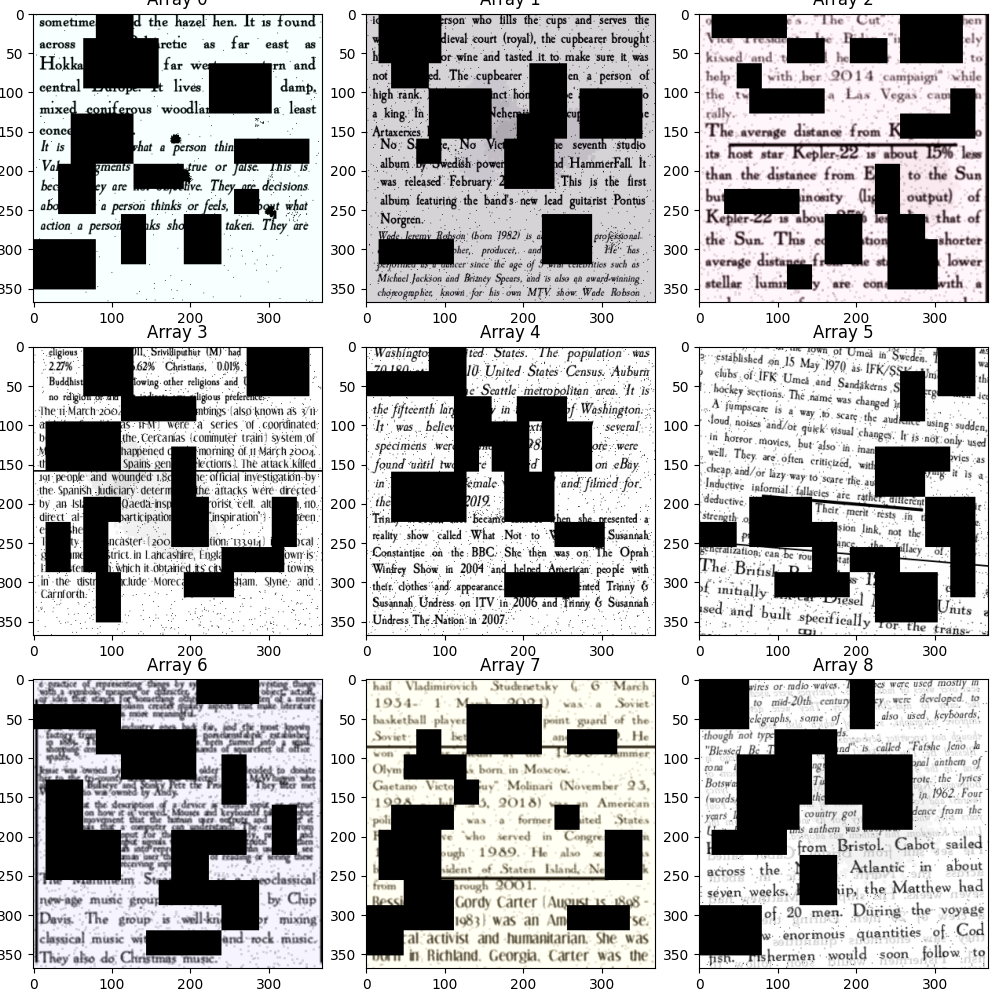

In [7]:
figures = []
for i in range(3):
    train_dataset.set_epoch(i)
    counter = 0
    for batch in train_dataset:
        if counter == 3:
            break
        im = batch["pixel_values"].numpy().astype("uint8").transpose(1, 2, 0)
        mask = batch["patch_mask"].numpy().reshape(23, 23)
        mask = np.kron(mask, np.ones((16, 16))).astype("uint8")
        
        im = im * (1 - mask[..., None])
        figures.append(im)
        counter += 1

im = plot_arrays(figures)
im

INFO:root:randomizing dataset with worker id=0 and epoch=0
INFO:root:randomizing dataset with worker id=0 and epoch=1
INFO:root:randomizing dataset with worker id=0 and epoch=2


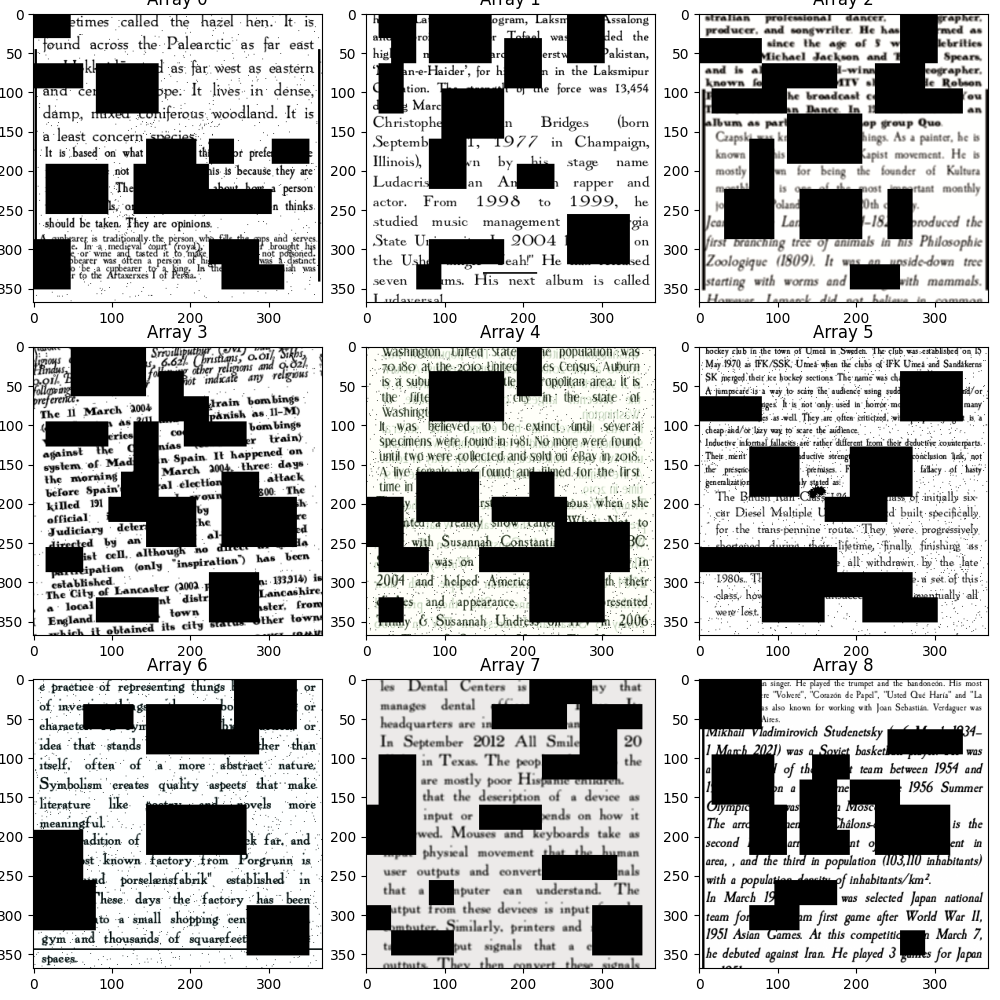

In [18]:
figures = []
for i in range(3):
    train_dataset.set_epoch(i)
    counter = 0
    for batch in train_dataset:
        if counter == 3:
            break
        im = batch["pixel_values"].numpy().astype("uint8").transpose(1, 2, 0)
        mask = batch["patch_mask"].numpy().reshape(23, 23)
        mask = np.kron(mask, np.ones((16, 16))).astype("uint8")
        
        im = im * (1 - mask[..., None])
        figures.append(im)
        counter += 1

im = plot_arrays(figures)
im

In [13]:
mask.min()

0.0